0    5894
1    2026
Name: label, dtype: int64


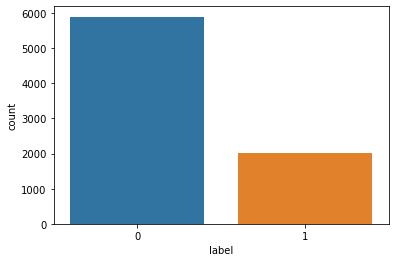

In [57]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stemmer = PorterStemmer()
data_train = pd.read_csv('train_2kmZucJ.csv')
#Supervised machine learning algorithm
#Counting liked data and unliked data

print(data_train['label'].value_counts())
sns.countplot(x=data_train['label'])
plt.show()
def pre_processing(data):
    #pre-processing to data (Using NLTK tool)
    for i in range(len(data)):
        text = re.sub('http://\S+|https://\S+', '', data['tweet'][i])
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.strip()
        text = text.lower()
        text = text.split()
        text = [word for word in text if word not in stopwords.words('english')]
        text = ' '.join(text)
        text = stemmer.stem(text)
        data['tweet'][i] = text 
        #corpus.append(text)
    return data

In [58]:
corpus = pre_processing(data_train)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_10616\3856357390.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'][i] = text


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus['tweet'], corpus['label'], test_size=0.2, random_state=42)

In [60]:
X_train


4252    cool car wash idea theisland bankholidaymonday...
4428    photo th birthday sony walkman thinkgeek nobod...
7374    ipads biggest pile fucking planet want throw f...
1410    yearbook hmmmmm instagram instagood together f...
7896    pissed macbook crashes apple company nothing a...
                              ...                        
5226    shana tova jewish newyear everyone may new yea...
5390             sick buying new cell phone chargers appl
860     want download free iphone app today spread sty...
7603    photo nikosx iphone beach holiday bw iphone bl...
7270     got iphone hehe iphone apple new finally seb los
Name: tweet, Length: 6336, dtype: object

In [61]:
X_test

4896    photo cause dressed today boyfriend dressedup ...
7539    skullcandy product brutal headphone always sto...
1677    sunset today zeeland samsung mobile samsung su...
1964    god playstation share feature cutting clips ea...
3025    awe da bestest boyfriend iloveyou cute cutie a...
                              ...                        
1419    today meee birthday cake sweet samsung bmw por...
3939                       arualcampbell nothing rear end
7834    using new macbookpro last days battery big tim...
5137    robertwindon fix junk apple power cords throw ...
4434    using zoooom zoom lens iphone dogwalks trevor ...
Name: tweet, Length: 1584, dtype: object

In [62]:
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
clf = MultinomialNB()

In [65]:
clf.fit(X_train, y_train)

MultinomialNB()

In [66]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [67]:
y_test.values

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [69]:
print(confusion_matrix(y_test, y_pred))

[[1058   94]
 [  64  368]]


In [70]:
print(accuracy_score(y_test, y_pred))

0.9002525252525253


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1152
           1       0.80      0.85      0.82       432

    accuracy                           0.90      1584
   macro avg       0.87      0.89      0.88      1584
weighted avg       0.90      0.90      0.90      1584



In [72]:
#testing code 
data_test = pd.read_csv('test_oJQbWVk.csv')
corpus = pre_processing(data_test)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_10616\3856357390.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'][i] = text


In [73]:
X_test = cv.transform(corpus['tweet'])
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [74]:
submitting_data = pd.DataFrame({'id': data_test['id'], 'label': y_pred})
submitting_data.to_csv("resulted_file.csv", index=False)